In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from ipywidgets import interact
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.rcParams ['figure.figsize'] = [18,8]

In [ ]:
#read file data set
df = pd.read_csv('WH.csv')

Data Set ini berjudul "Male & Female height and weight" yang saya ambil dari kaggle, dimana berisi tinggi dan berat badan laki-laki dan perempuan

In [ ]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [ ]:
#Melakukan Klasifikasi
for i in df['Sex'].unique() :
    print ("Banyaknya %s adalah %i " % (i, len(df[df['Sex'] == i])))

Banyaknya Female adalah 99 
Banyaknya Male adalah 106 


In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# mengubah nilai dari 2 jenis fossum menjadi 0 dan 1
df = df.replace(df['Sex'].unique(), [0,1])

In [ ]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [ ]:
df['Sex'].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


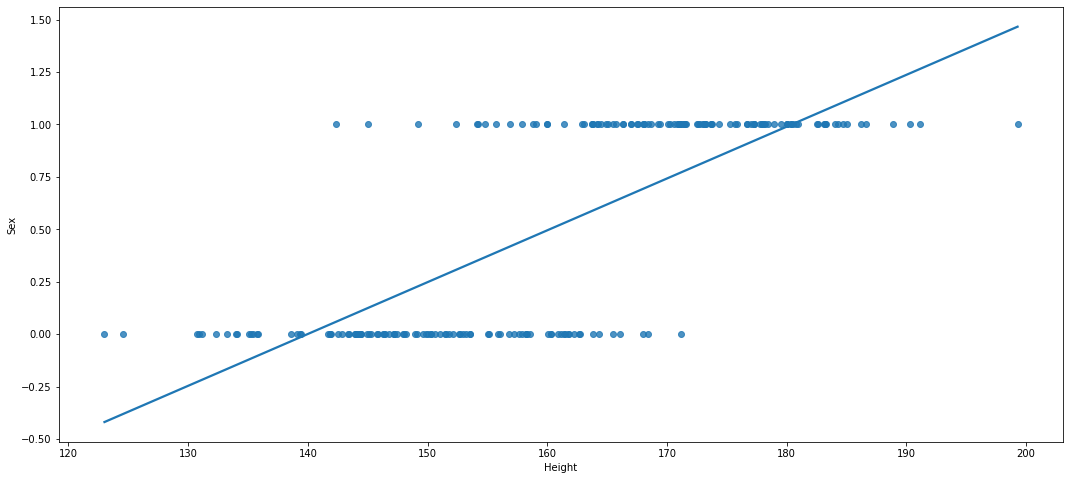

In [ ]:
#Plot data dengan regresi linear
sns.regplot(df['Height'], df['Sex'], data=df, order=1, ci=None)
plt.show()

In [ ]:
@interact
def rl_library_ketelitian (tingkat_akurasi = [2,1,0.5,0.1]) :
    X_train = df[['Height']].values
    y = df['Sex'].values

    #Melakukan generate dataset secara berurutan berdasarkan nilai min max datanya
    X_test = np.arange(df['Height'].min(), df['Height'].max(), tingkat_akurasi).reshape(-1,1)

    #Membuat model regresi logistik dengan menggunakan library
    clf = LogisticRegression()
    clf.fit(X_train, y)
    prob = clf.predict_proba(X_test)

    #Visualisasi hasil prediksi
    plt.title('Visualisasi regresi logistik data Iris')
    plt.scatter(X_train, y, color='blue')
    plt.plot(X_test, prob[:,1], color='Red')
    plt.xlabel('Height')
    plt.ylabel('Sex')
    plt.grid()
    plt.show()
    
    #Ambil dataset terlebih dahulu, kemudian bagi menjadi data training dan data testing
    X = df[['Height']].to_numpy()
    Y = df['Sex'].to_numpy()
    
    
    #Pembangian data training dan data testing yang ini berbeda dengan pembagian diatas
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    predicted = clf.predict(X_test)
    print("Intercept dan Slope : ")
    print (clf.intercept_)
    print (clf.coef_)
    
    #Melakukan [erhitungan akurasi
    print("\nAkurasi : ", clf.score(X_test, y_test), "\n")
    precision, recall, fscore, support = score(y_test, predicted)

    print(classification_report(y_test, predicted, target_names=['No', 'Yes']))
    print("\nConfusion Matix \n", confusion_matrix(y_test, predicted))

interactive(children=(Dropdown(description='tingkat_akurasi', options=(2, 1, 0.5, 0.1), value=2), Output()), _…

1. Banyaknya data testing akan sangat berpengaruh terhadap hasil gambar. Dikarenakan Data digenerate secara terurut, maka tingkat akurasi pada saat melakukan generate dapat mempengaruhi hasil grafik
2. Hasil regresi logistik ini sudah cukup baik, dengan tingkat akurasi sebesar 1 --> 100%

In [ ]:
# menggunakan beberapa persamaan yang di simpan kedalam file manual.py yang dapat dipanggil menggunakan lr sebagi method
import manual as rl

In [ ]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state = 0)
scaler = MinMaxScaler()

X_train = data_train[['Height']].to_numpy()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


X_test = data_test[['Height']].to_numpy()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Y_train = data_train['Sex'].to_numpy()
Y_test  = data_test['Sex'].to_numpy()

In [ ]:
w_hat = rl.regresi_logistik(X_train, Y_train,
                         num_steps = 50000, learning_rate = 1e-5, add_intercept=True, wclass=rl.getWclass(df, 'Sex'))
print("Koefisien (Manual) :", w_hat)

-113.6749183318871
-108.33171104443116
-103.7650907128289
-99.7438396298043
-96.18833192685287
-93.03507610052391
-90.22944169439792
-87.72448464595719
-85.48006519566488
-83.46196267014639
Koefisien (Manual) : [-1.74219294  3.53945346]


In [ ]:
#Melakukan prediksi dan perbandingan Manual
preds = rl.logreg_prediction(X_test,w_hat, add_intercept=True)
print(classification_report(Y_test, preds, target_names=['N', 'Y']))

              precision    recall  f1-score   support

           N       0.93      0.82      0.87        17
           Y       0.88      0.96      0.92        24

    accuracy                           0.90        41
   macro avg       0.91      0.89      0.90        41
weighted avg       0.90      0.90      0.90        41



In [ ]:
#Melakukan prediksi dan perbandingan Menggunakan Library
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted, target_names=['N', 'Y']))

              precision    recall  f1-score   support

           N       0.93      0.82      0.87        17
           Y       0.88      0.96      0.92        24

    accuracy                           0.90        41
   macro avg       0.91      0.89      0.90        41
weighted avg       0.90      0.90      0.90        41



In [ ]:
print("Koefisien model kita", w_hat)
print("Koefisien scikit learn", clf.intercept_, clf.coef_)

Koefisien model kita [-1.74219294  3.53945346]
Koefisien scikit learn [-2.46390714] [[4.96418131]]


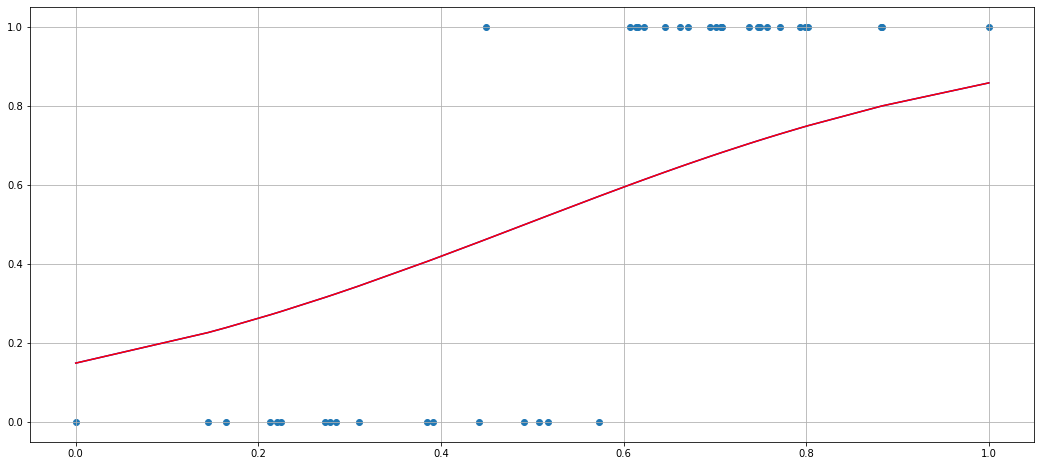

In [ ]:
#MEnentukan Regresi Logistik
prob_hat = rl.logreg_class_prob(X_test,w_hat, add_intercept=True)
prob = clf.predict_proba(X_test)
prob = prob[:,1]

idx_prob_hat = np.argsort(prob_hat)
idx_prob = np.argsort(prob)

plt.scatter(X_test,Y_test)
plt.plot(X_test[idx_prob_hat], prob_hat[idx_prob_hat], color="Blue")
plt.plot(X_test[idx_prob], prob_hat[idx_prob], color="Red")
plt.grid()
plt.show()

In [ ]:
idx_prob

array([10, 16, 17, 32,  5, 22,  6, 11, 13, 25,  2, 21, 29, 31,  0, 26, 27,
       14, 39, 15, 19,  7, 18, 34, 35, 38,  4, 37, 23,  8,  3, 40, 28, 20,
       12, 24, 33, 30, 36,  9,  1])

In [ ]:
idx_prob_hat

array([10, 16, 17, 32,  5, 22,  6, 11, 13, 25,  2, 21, 29, 31,  0, 26, 27,
       14, 39, 15, 19,  7, 18, 34, 35, 38,  4, 37, 23,  8,  3, 40, 28, 20,
       12, 24, 33, 30, 36,  9,  1])

In [ ]:
#Hasil yang di dapat memiliki Nilai akurasi yang Bisa di bilang lumayana bagus